In [ ]:
!conda update --all
!conda install -c conda-forge -y notebook=4.2.3
import sys
!conda install --yes --prefix {sys.prefix} pandas
!conda install --yes --prefix {sys.prefix} sklearn-contrib-lightning
!conda install --yes --prefix {sys.prefix} seaborn
!conda install --yes --prefix {sys.prefix} cartopy


In [144]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

In [145]:
sns.set(color_codes=True)
sns.set_palette('colorblind')
%matplotlib inline

In [146]:
# path = '/tmp/data/world-happiness-report'   # path to local data
path = 'c:\\sg\world-happiness-data-analysis\dataset'  # path to data in Kaggle notebook
dat2015 = pd.read_csv(os.path.join(path, '2015.csv'))
dat2016 = pd.read_csv(os.path.join(path, '2016.csv'))
dat2017 = pd.read_csv(os.path.join(path, '2017.csv'))
# dat2018 = pd.read_csv(os.path.join(path, '2018.csv'))
# dat2019 = pd.read_csv(os.path.join(path, '2019.csv'))

In [147]:
dat2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [148]:
dat2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [149]:
dat2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [150]:
# 2017 data does not contain region, we create it based on the 2016 data:

dat2017 = pd.merge(dat2017, dat2016.loc[:, ['Country', 'Region']], on='Country')

In [151]:
dat2017.rename(columns={'Happiness.Rank': 'Happiness Rank',
                       'Happiness.Score': 'Happiness Score',
                       'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                       'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                       'Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual'}, inplace=True)

In [152]:
dat2017.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe


In [153]:
(any(dat2015.duplicated('Country').values)
    or any(dat2016.duplicated('Country').values)
    or any(dat2017.duplicated('Country').values))

False

In [154]:
dat2015.set_index('Country', inplace=True)
dat2016.set_index('Country', inplace=True)
dat2017.set_index('Country', inplace=True)

In [155]:
shp_filename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
# shp_filename = "c:\\sg\world-happiness-data-analysis\ne_110m_admin_0_countries.shp"
assert os.path.exists(shp_filename)
shp_reader = shpreader.Reader(shp_filename)

In [156]:
# Fix country names
country_name_map = {'Bosnia and Herz.': 'Bosnia and Herzegovina',
                    'Czechia': 'Czech Republic',
                    'Congo': 'Congo (Brazzaville)',
                    'Dem. Rep. Congo': 'Congo (Kinshasa)',
                    'Dominican Rep.': 'Dominican Republic',
                    'Greenland': 'Denmark',
                    'Palestine': 'Palestinian Territories',
                    'Somaliland': 'Somalia',
                   'United States of America': 'United States'}

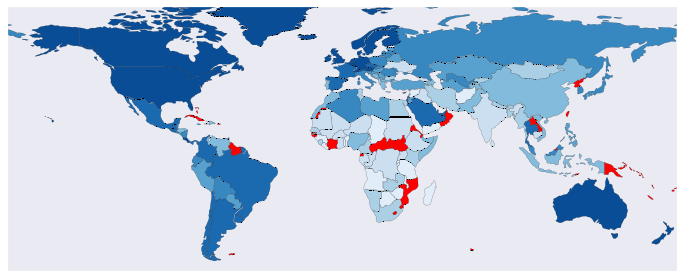

In [157]:
plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.add_feature(cartopy.feature.OCEAN)
ax.set_extent([-150, 60, -25, 60])

map_colors = sns.color_palette('Blues_r', 8)

for country in shp_reader.records():
    if country.attributes['NAME'] in country_name_map:
        name = country_name_map[country.attributes['NAME']]
    else:
        name = country.attributes['NAME']
    n=country
    if name in dat2017.index:
        try:
          ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=map_colors[int(dat2017.loc[name, "Happiness Rank"] / (dat2017['Happiness Rank'].max() + 1) * len(map_colors))],
                            alpha = 1.00, linewidth =0.15, edgecolor = "black", label=n.attributes['ADM0_A3']) 
        except Exception as e:
          #print(e)
          import shapely.wkt as wkt
          from shapely.geometry import MultiPolygon
          list_str_polygons = [str(n.geometry)]
          c = MultiPolygon(map(wkt.loads, list_str_polygons))
          ax.add_geometries(c, ccrs.PlateCarree(), facecolor=map_colors[int(dat2017.loc[name, "Happiness Rank"] / (dat2017['Happiness Rank'].max() + 1) * len(map_colors))],
                            alpha = 1.00, linewidth =0.15, edgecolor = "black", label=n.attributes['ADM0_A3']) 

    else:
        try:
          ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=(1, 0, 0),
                            alpha = 1.00, linewidth =0.15, edgecolor = "black", 
                            label=n.attributes['ADM0_A3']) 
        except Exception as e:
          #print(e)
          import shapely.wkt as wkt
          from shapely.geometry import MultiPolygon
          list_str_polygons = [str(n.geometry)]
          c = MultiPolygon(map(wkt.loads, list_str_polygons))
          ax.add_geometries(c, ccrs.PlateCarree(), facecolor=(1, 0, 0), alpha = 1.00, linewidth =0.15, edgecolor = "black", label=n.attributes['ADM0_A3']) 


Plotting the histograms of the yearly happiness scores on top of each other shows a small shift towards more happiness from 2015 to 2017.

Text(0.5, 0, 'Happiness Score')

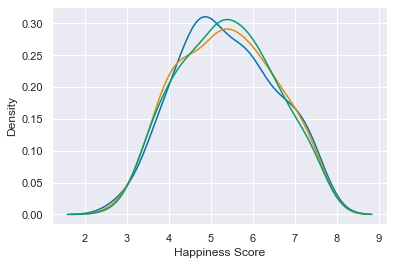

In [158]:
sns.kdeplot(dat2015['Happiness Score'], label='2015')
sns.kdeplot(dat2016['Happiness Score'], label='2016')
sns.kdeplot(dat2017['Happiness Score'], label='2017')
plt.xlabel('Happiness Score')


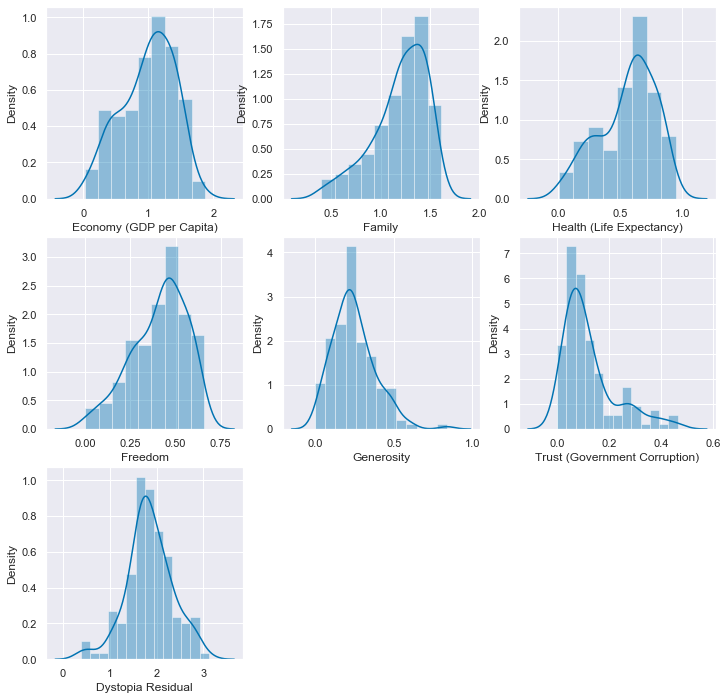

In [159]:
import warnings
warnings.filterwarnings("ignore")

happiness_factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Generosity', 'Trust (Government Corruption)', 
           'Dystopia Residual']

def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        sns.distplot(data[column])

plt.figure(figsize=(12,12))
plot_columns_on_grid(dat2017, happiness_factors, (3, 3))


Some of the distributions look like we have at least two distinct groups of countries. For instance the Health data has the majority clustered around 0.7 but also a second group of countries around 0.3.

Happiness change from 2015 to 2017

In [160]:
dat2017['Happiness Change'] = dat2017['Happiness Score'] - dat2015['Happiness Score']
dat2017['Happiness Change'].describe()


count    146.000000
mean      -0.000986
std        0.331261
min       -1.560000
25%       -0.148500
50%        0.003000
75%        0.199500
max        0.752000
Name: Happiness Change, dtype: float64

Find the country with the biggest improvement of happiness

Latvia improves the most

In [161]:
country_max_chg = dat2017['Happiness Change'].idxmax()
dat2017.loc[country_max_chg]


Happiness Rank                                           54
Happiness Score                                        5.85
Whisker.high                                        5.92026
Whisker.low                                         5.77974
Economy (GDP per Capita)                            1.26075
Family                                              1.40471
Health (Life Expectancy)                           0.638567
Freedom                                            0.325708
Generosity                                         0.153075
Trust (Government Corruption)                     0.0738427
Dystopia Residual                                   1.99366
Region                           Central and Eastern Europe
Happiness Change                                      0.752
Name: Latvia, dtype: object

See the changes in the individual parameters

In [162]:
dat2017.loc[country_max_chg, happiness_factors] - dat2015.loc[country_max_chg, happiness_factors]


Economy (GDP per Capita)          0.147629
Family                            0.309095
Health (Life Expectancy)         -0.085803
Freedom                          0.0289979
Generosity                      -0.0291852
Trust (Government Corruption)    0.0105227
Dystopia Residual                 0.371505
Name: Latvia, dtype: object

Find the country with the biggest loss of happiness

In [163]:
country_min_chg = dat2017['Happiness Change'].idxmin()
dat2017.loc[country_min_chg]

Happiness Rank                                            82
Happiness Score                                         5.25
Whisker.high                                         5.37003
Whisker.low                                          5.12997
Economy (GDP per Capita)                             1.12843
Family                                               1.43134
Health (Life Expectancy)                            0.617144
Freedom                                             0.153997
Generosity                                         0.0650196
Trust (Government Corruption)                      0.0644911
Dystopia Residual                                    1.78946
Region                           Latin America and Caribbean
Happiness Change                                       -1.56
Name: Venezuela, dtype: object

See the changes in the individual parameters

In [164]:
dat2017.loc[country_min_chg, happiness_factors] - dat2015.loc[country_min_chg, happiness_factors]


Economy (GDP per Capita)          0.0841912
Family                             0.175378
Health (Life Expectancy)          -0.103376
Freedom                           -0.275083
Generosity                       0.00660963
Trust (Government Corruption)    -0.0461989
Dystopia Residual                  -1.40185
Name: Venezuela, dtype: object

Happiness by region

In [165]:
by_region = dat2017.groupby('Region')
by_region[['Happiness Score', 'Happiness Change'] + happiness_factors].mean().sort_values(by='Happiness Score', ascending=False)


,Happiness Score,Happiness Change,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
Region,,,,,,,,,
Australia and New Zealand,7.299000,0.014000,1.445060,1.529119,0.830323,0.607835,0.488852,0.342000,2.055834
North America,7.154500,-0.118500,1.512732,1.450635,0.804422,0.558421,0.414059,0.211505,2.202689
Western Europe,6.703714,0.014095,1.457411,1.444946,0.824673,0.515125,0.303497,0.218999,1.939043
Latin America and Caribbean,5.957818,-0.180857,1.006981,1.290156,0.611009,0.449222,0.210696,0.087764,2.301928
Eastern Asia,5.496500,0.000250,1.231749,1.304615,0.778222,0.407620,0.173630,0.070685,1.529958
Southeastern Asia,5.444875,0.072250,0.965253,1.249948,0.581918,0.534971,0.449860,0.127591,1.535369
Central and Eastern Europe,5.409931,0.077000,1.092051,1.282285,0.636090,0.346609,0.186116,0.079620,1.787129
Middle East and Northern Africa,5.369684,0.038895,1.168535,1.095511,0.605980,0.363768,0.199172,0.149084,1.787599
Southern Asia,4.628429,0.047571,0.697479,0.931875,0.456658,0.398971,0.341446,0.103066,1.698851


Factors contributing to happiness
Influence of the 6 factors Economy, Family, etc. on happiness depending on regions. Nomalize the factors to the total happiness score.
The economy and family are by far the most important contributors to the total happiness score. Generosity and Government Trust are the least important factors.

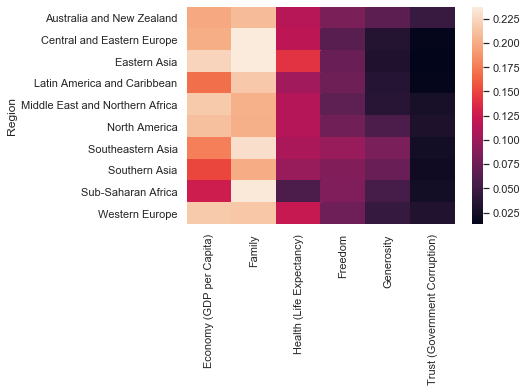

In [166]:
sns.heatmap(by_region[happiness_factors[:-1]].mean().div(by_region['Happiness Score'].mean(), axis='index'))


Cluster analysis

In the original data, the happiness factors such as Economy, Family, etc. sum up to the happiness Score. Consequently, a countries with high happiness score also tend to have high factors. To analyze how the influence of economy on happiness varies between countries, we first normalize the factors using the total happiness score.


In [167]:
dat2017_norm = dat2017
dat2017_norm[happiness_factors] = dat2017_norm[happiness_factors].div(dat2017['Happiness Score'].values, axis=0)


Cluster analysis based on the happiness factors using the k-means method

In [168]:
cluster_n = 3
k_means = KMeans(init='k-means++', n_clusters=cluster_n, n_init=10)
cluster_labels = k_means.fit_predict(dat2017_norm[happiness_factors[:-1]])


Plot distributions of the factors for each cluster:



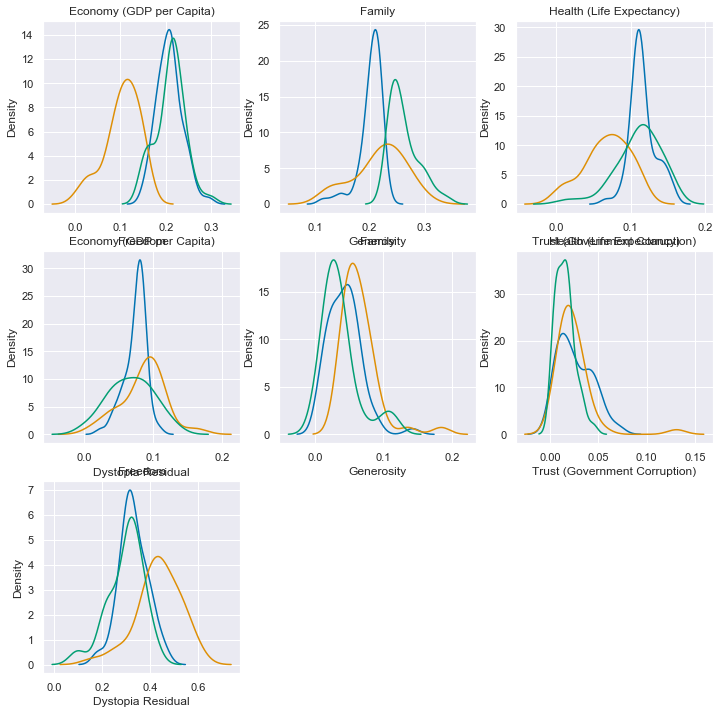

In [169]:
plt.figure(figsize=(12,12))
for i, factor in enumerate(happiness_factors):
    ax = plt.subplot(3, 3, i+1)
    for cluster in range(cluster_n):
        sns.kdeplot(dat2017_norm.loc[cluster_labels == cluster, factor], label=cluster)
        ax.set_title(factor)


Compare happiness score distribution for the clusters:


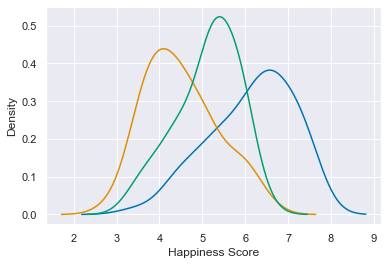

In [170]:
for cluster in range(cluster_n):
    sns.kdeplot(dat2017.loc[cluster_labels == cluster, 'Happiness Score'], label=cluster)


There is a big difference between the happiness score distributions of the clusters.

In [171]:
dat2017['Cluster'] = cluster_labels


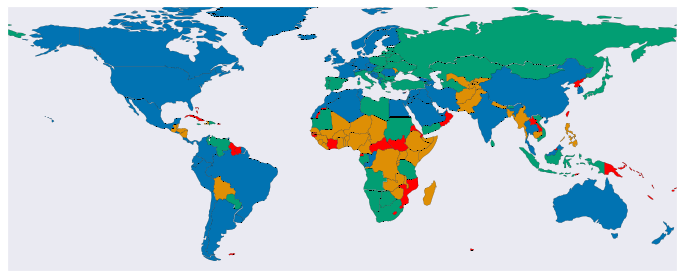

In [172]:
plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.add_feature(cartopy.feature.OCEAN)
ax.set_extent([-150, 60, -25, 60])

for country in shp_reader.records():
    if country.attributes['NAME'] in country_name_map:
        name = country_name_map[country.attributes['NAME']]
    else:
        name = country.attributes['NAME']
    n = country
    if name in dat2017.index:
        try:
          ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=sns.color_palette()[dat2017.loc[name, 'Cluster']],
                            alpha = 1.00, linewidth =0.15, edgecolor = "black", label=n.attributes['ADM0_A3']) 
        except Exception as e:
          #print(e)
          import shapely.wkt as wkt
          from shapely.geometry import MultiPolygon
          list_str_polygons = [str(n.geometry)]
          c = MultiPolygon(map(wkt.loads, list_str_polygons))
          ax.add_geometries(c, ccrs.PlateCarree(), facecolor=sns.color_palette()[dat2017.loc[name, 'Cluster']],
                            alpha = 1.00, linewidth =0.15, edgecolor = "black", label=n.attributes['ADM0_A3']) 
    else:
        try:
          ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=(1, 0, 0),
                            alpha = 1.00, linewidth =0.15, edgecolor = "black", 
                            label=n.attributes['ADM0_A3']) 
        except Exception as e:
          #print(e)
          import shapely.wkt as wkt
          from shapely.geometry import MultiPolygon
          list_str_polygons = [str(n.geometry)]
          c = MultiPolygon(map(wkt.loads, list_str_polygons))
          ax.add_geometries(c, ccrs.PlateCarree(), facecolor=(1, 0, 0), alpha = 1.00, linewidth =0.15, edgecolor = "black", label=n.attributes['ADM0_A3']) 

            
#         ax.add_geometries(country.geometry, ccrs.PlateCarree(),
#                           facecolor=sns.color_palette()[dat2017.loc[name, 'Cluster']],
#                           label=country.attributes['ADM0_A3'])
#     else:
#         ax.add_geometries(country.geometry, ccrs.PlateCarree(),
#                           facecolor=(1, 0, 0),
#                           label=country.attributes['ADM0_A3'])  


This map visualizes coutries clustered by the factors contributing to happiness.

Bright red colored countries are not part of the analysis.